# Homework 3: Two-Class and Multi-Class Classification

In [24]:
# Author Name: Romi Lifshitz

# With guidance from course textbook: Machine Learning Refined
# Instructions can be found in the HW3_Instructions.pdf file on git

import autograd.numpy as np
from autograd import grad
from autograd import value_and_grad
import matplotlib.pyplot as pyplot 

# Exercise 1: Classifying Breast Cancer

In [85]:
# data input
csvname = 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:]

### 1.1 - Implementig softmax() and perceptron()

In [131]:
# compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# an implementation of the softmax cost
def softmax(w):    
    # compute the least squares cost
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

# an implementation of the perceptron cost
def perceptron(w):
    mod = -y*model(x,w)
    cost = np.sum(np.maximum(0,mod))
    return cost/float(np.size(y))

### 1.2 - Using gradient descent with softmax and perceptron to determine cost and weight history

In [87]:
# gradient descent function - inputs: g (input function), 
# alpha (steplength parameter), 
# max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [88]:
w = 0.1*np.random.randn(9,1)
# The cost and weight history corresponding to optimization 
# with each cost function are stored in the variables below:
w_history_soft, c_history_soft = gradient_descent(softmax,1.0,1000,w)
w_history_percep, c_history_percep = gradient_descent(perceptron,0.1,1000,w)

### 1.3 - Creating miscount() and finding miscount history

In [89]:
def miscount(w,x,y): # w is one set of weights from the weight history
    I = 0
    for i in range(0,x.shape[1]):
        y_pred = model(x[:,i],w)
        y_actual = y[0][i]
        if np.sign(y_pred) != y_actual:
            I += 1
    return I

miscount_history_soft = [miscount(v,x,y) for v in w_history_soft]
miscount_history_percep = [miscount(v,x,y) for v in w_history_percep]

### 1.4 - Comparing Performance of Cost Functions

#### Plotting cost function history and misclassification history versus number of iterations

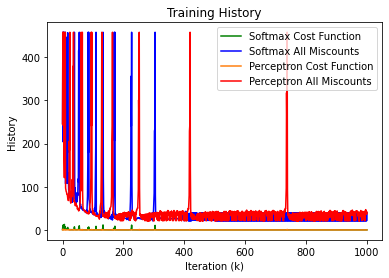

In [90]:
pyplot.plot(np.linspace(0,len(c_history_soft),len(c_history_soft)), c_history_soft, color='g', label='Softmax Cost Function')
pyplot.plot(np.linspace(0,len(miscount_history_soft),len(miscount_history_soft)), miscount_history_soft, color='b', label='Softmax All Miscounts')

pyplot.plot(np.linspace(0,len(c_history_percep),len(c_history_percep)), c_history_percep, color='tab:orange', label='Perceptron Cost Function')
pyplot.plot(np.linspace(0,len(miscount_history_percep),len(miscount_history_percep)), miscount_history_percep, color='r', label='Perceptron All Miscounts')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('History')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

#### Determining the minimum number of misclassifications for the 2 cost functions along with the misclassified malignant cases

In [91]:
print("The minimum number of misclassiciations for optimization using softmax is: ", min(miscount_history_soft))
print("The minimum number of misclassiciations for optimization using the perceptron is: ", min(miscount_history_percep))

The minimum number of misclassiciations for optimization using softmax is:  21
The minimum number of misclassiciations for optimization using the perceptron is:  20


The MINIMUM number of malignant misclassiciations for optimization using softmax is:  0
The TOTAL number of malignant misclassiciations for optimization using softmax is:  20239
The MINIMUM number of malignant misclassiciations for optimization using the perceptron is:  0
The TOTAL number of malignant misclassiciations for optimization using the perceptron is:  21152


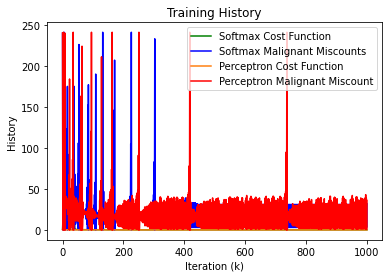

In [92]:
def miscount_malignant(w,x,y):
    I = 0
    for i in range(0,x.shape[1]):
        y_pred = model(x[:,i],w)
        y_actual = y[0][i]
        if np.sign(y_pred) != y_actual and y_actual == -1:
            I += 1
    return I

miscount_history_soft = [miscount_malignant(v,x,y) 
                         for v in w_history_soft]
miscount_history_percep = [miscount_malignant(v,x,y) 
                           for v in w_history_percep]

pyplot.plot(np.linspace(0,len(c_history_soft),len(c_history_soft)), 
            c_history_soft, color='g', label='Softmax Cost Function')
pyplot.plot(np.linspace(0,len(miscount_history_soft),len(miscount_history_soft)), 
            miscount_history_soft, color='b', label='Softmax Malignant Miscounts')

pyplot.plot(np.linspace(0,len(c_history_percep),len(c_history_percep)), 
            c_history_percep, color='tab:orange', label='Perceptron Cost Function')
pyplot.plot(np.linspace(0,len(miscount_history_percep),len(miscount_history_percep)), 
            miscount_history_percep, color='r', label='Perceptron Malignant Miscount')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('History')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

print("The MINIMUM number of malignant misclassiciations for optimization using softmax is: ", min(miscount_history_soft))
print("The TOTAL number of malignant misclassiciations for optimization using softmax is: ", sum(miscount_history_soft))
print("The MINIMUM number of malignant misclassiciations for optimization using the perceptron is: ", min(miscount_history_percep))
print("The TOTAL number of malignant misclassiciations for optimization using the perceptron is: ", sum(miscount_history_percep))

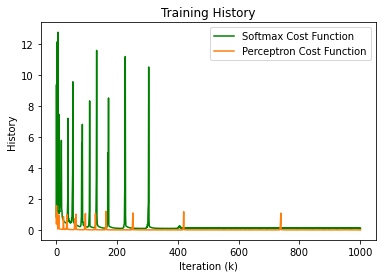

In [93]:
# Also, to get a more clear view of the cost histories:
pyplot.plot(np.linspace(0,len(c_history_soft),len(c_history_soft)), c_history_soft, color='g', label='Softmax Cost Function')
pyplot.plot(np.linspace(0,len(c_history_percep),len(c_history_percep)), c_history_percep, color='tab:orange', label='Perceptron Cost Function')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('History')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

### 1.5 - Logistic Regression and Cross Entropy Loss

In [94]:
a=np.argwhere(y>0.9)
b=np.argwhere(y<-0.9)
yc=np.arange(699)
yc[a]=1
yc[b]=0

In [95]:
# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
lam = 2*10**(-3)
def cross_entropy(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))

    # compute cost of label 0 points
    ind = np.argwhere(yc == 0)
    cost = -np.sum(np.log(1 - a[:,ind]))

    # add cost on label 1 points
    ind = np.argwhere(yc==1)
    cost -= np.sum(np.log(a[:,ind]))

    # add regularizer
    cost += lam*np.sum(w[1:]**2)

    # compute cross-entropy
    return cost/float(np.size(yc))

#### Determining weight and cost history

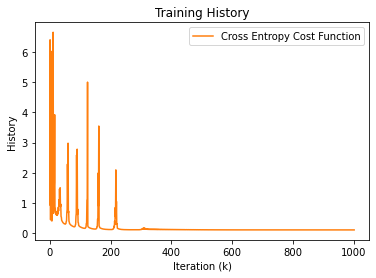

In [96]:
w = 0.1*np.random.randn(9,1)

# The cost and weight history corresponding to optimization 
# with cross entropy loss are stored in the variables below:
w_history_cross, c_history_cross = gradient_descent(cross_entropy,0.6,1000,w)

# Here is a graph of the cost history in case you would like to visualize it: 
pyplot.plot(np.linspace(0,len(c_history_cross),len(c_history_cross)), c_history_cross, color='tab:orange', label='Cross Entropy Cost Function')
pyplot.xlabel('Iteration (k)')
pyplot.ylabel('History')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

#### Determining number of misclassifications using weight history

In [97]:
# Redefining misclassification in this case:

def miscount_cross(w,x,y): 
    # where is one set of weights
    I = 0
    for i in range(0,x.shape[1]):
        y_pred = np.round(sigmoid(model(x[:,i],w)))
        y_actual = y[i]
        if y_pred != y_actual:
            I += 1
    return I

miscount_history_cross = [miscount_cross(v,x,yc) for v in w_history_cross]
print("The MINIMUM number of misclassiciations for optimization using logistic regression is: ", min(miscount_history_cross))
print("The TOTAL number of misclassiciations for optimization using logistic regression is: ", sum(miscount_history_cross))

The MINIMUM number of misclassiciations for optimization using logistic regression is:  23
The TOTAL number of misclassiciations for optimization using logistic regression is:  42461


# Exercise 2: Classifying Spam Mail

### 2.1 - Gradient descent, cost and weight history, miscount history

In [140]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):    
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]   

    # check to make sure that x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind] # Just keep the row index
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # fill in any nan values with means 
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In [141]:
# data input
csvname = 'spambase_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)

In [142]:
def miscount(w,x,y): # w here is one set of weights
    I = 0
    for i in range(0,x.shape[1]):
        y_pred = model(x[:,i],w)
        y_actual = y[0][i]
        if np.sign(y_pred) != y_actual:
            I += 1
    return I

### 2.1 - Using gradient descent to classify emails using softmax or perceptron cost, and construct miscount history

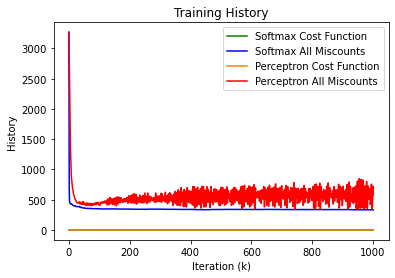

In [149]:
w = 0.1*np.random.randn(58,1)

# The cost and weight histories corresponding to optimization 
# with each cost function are stored in the variables below:
w_history_soft, c_history_soft = gradient_descent(softmax,1.0,1000,w)
w_history_percep, c_history_percep = gradient_descent(perceptron,0.1,1000,w)

# The miscount histories corresponding to optimization 
# with each cost function are stored in the variables below:
miscount_history_soft = [miscount(v,x,y) for v in w_history_soft]
miscount_history_percep = [miscount(v,x,y) for v in w_history_percep]

pyplot.plot(np.linspace(0,len(c_history_soft),len(c_history_soft)), c_history_soft, color='g', label='Softmax Cost Function')
pyplot.plot(np.linspace(0,len(miscount_history_soft),len(miscount_history_soft)), miscount_history_soft, color='b', label='Softmax All Miscounts')

pyplot.plot(np.linspace(0,len(c_history_percep),len(c_history_percep)), c_history_percep, color='tab:orange', label='Perceptron Cost Function')
pyplot.plot(np.linspace(0,len(miscount_history_percep),len(miscount_history_percep)), miscount_history_percep, color='r', label='Perceptron All Miscounts')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('History')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

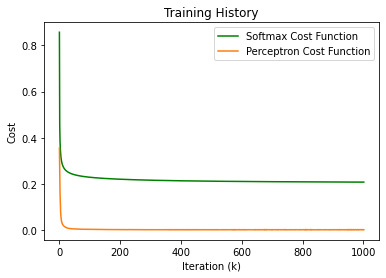

In [152]:
pyplot.plot(np.linspace(0,len(c_history_soft),len(c_history_soft)), c_history_soft, color='g', label='Softmax Cost Function')
pyplot.plot(np.linspace(0,len(c_history_percep),len(c_history_percep)), c_history_percep, color='tab:orange', label='Perceptron Cost Function')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('Cost')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

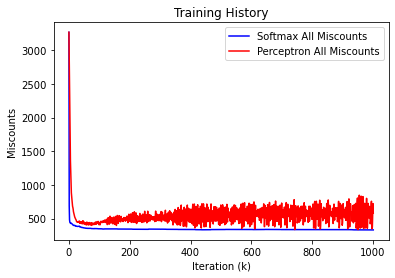

In [153]:
pyplot.plot(np.linspace(0,len(miscount_history_soft),len(miscount_history_soft)), miscount_history_soft, color='b', label='Softmax All Miscounts')
pyplot.plot(np.linspace(0,len(miscount_history_percep),len(miscount_history_percep)), miscount_history_percep, color='r', label='Perceptron All Miscounts')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('Miscounts')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

**Comment On Your Observations**
<br/> As can be seen, the perceptron has many more miscounts overall than the softmax–as expected. However, the cost function of the perceptron achieves a lower minimum than that of softmax. This shows that it is possible for the cost function to be greater while misclassifications is lower.

### 2.2 - Accuracy and smallest number of misclassifications

In [154]:
def accuracy(w_history, miscount_history, x, y):
    """
    This function calculates the accuracy based on the 
    total number of misclassifications (for both classes combined).
    Returns:
        acc: the best possible accuracy; meaning, the accuracy 
            using the weights corresponding to the lowest number of misclassifications)
        i: The index of w_history corresponding to the set of weights 
             that produce the least number of misclassifications
    """
    # Find index i corresponding to the minimum value of miscount_history_percep.
    # This is the index of the set of weights that give the least # of misclassif
    min_miscounts = min(miscount_history)
    for i in range(0, len(miscount_history)):
        if miscount_history[i] == min_miscounts:
            break
    # Count the number of misclassifications for the best set of weights
    # (the one with least misclassifications, at index i), and store in misc.
    misc = miscount(w_history[i],x,y)
    acc = 1 - misc/float(np.size(y))
    return acc, i

#### Softmax min misclassifications, and corresponding best accuracy and  best weight

In [155]:
soft_acc = accuracy(w_history_soft, miscount_history_soft, x, y)[0]
soft_index = accuracy(w_history_soft, miscount_history_soft, x, y)[1]

print("The minimum number of misclassiciations for optimization using softmax cost is: ", min(miscount_history_soft))
print("The best accuracy achieved using the softmax cost is: ", soft_acc*100, "%")
# checking: miscount_history_soft[soft_index] == min(miscount_history_soft)
print("The w corresponding to this best accuracy is: \n", w_history_soft[soft_index])

The minimum number of misclassiciations for optimization using softmax cost is:  332
The best accuracy achieved using the softmax cost is:  92.7841773527494 %
The w corresponding to this best accuracy is: 
 [[-2.28901336e+00]
 [-9.46348236e-02]
 [-2.05362750e-01]
 [ 7.40010751e-02]
 [ 7.67403766e-01]
 [ 3.69675243e-01]
 [ 1.70762189e-01]
 [ 9.61194567e-01]
 [ 2.27479058e-01]
 [ 1.53863829e-01]
 [ 7.21150364e-02]
 [-4.13234439e-02]
 [-1.31655478e-01]
 [-3.07219791e-02]
 [ 3.26547232e-02]
 [ 2.48410738e-01]
 [ 7.85157925e-01]
 [ 4.07481052e-01]
 [ 8.17749800e-02]
 [ 1.52729879e-01]
 [ 4.67254643e-01]
 [ 2.81216662e-01]
 [ 3.10755407e-01]
 [ 9.20442413e-01]
 [ 2.43598645e-01]
 [-2.45925956e+00]
 [-1.08188782e+00]
 [-3.27844160e+00]
 [ 2.28243096e-01]
 [-8.90693019e-01]
 [-1.52585902e-01]
 [-4.53301894e-01]
 [-1.72093919e-01]
 [-5.08514987e-01]
 [-2.00114960e-01]
 [-8.80383361e-01]
 [ 3.51323585e-01]
 [-7.04368394e-04]
 [-1.19392110e-01]
 [-3.13524241e-01]
 [-1.86360390e-01]
 [-1.06634625e

#### Perceptron min misclassifications, and corresponding best accuracy and best weight

In [156]:
percep_acc = accuracy(w_history_percep, miscount_history_percep, x, y)[0]
percep_index = accuracy(w_history_percep, miscount_history_percep, x, y)[1]
print("The minimum number of misclassiciations for optimization using perceptron cost is: ", min(miscount_history_percep))
# checking: miscount_history_percep[percep_index] == min(miscount_history_percep)
print("The best accuracy achieved using perceptron cost is: ", percep_acc*100, "%")
print("The w corresponding to this best accuracy is: \n", w_history_percep[percep_index])

The minimum number of misclassiciations for optimization using perceptron cost is:  337
The best accuracy achieved using perceptron cost is:  92.67550532492936 %
The w corresponding to this best accuracy is: 
 [[-2.77038123e-02]
 [-2.78880008e-03]
 [-3.93066992e-03]
 [ 1.04896690e-03]
 [ 7.16226235e-02]
 [ 3.73967239e-03]
 [ 2.31002223e-03]
 [ 5.82854367e-03]
 [ 2.11927033e-03]
 [ 2.35897821e-03]
 [ 1.24310083e-03]
 [-1.79224536e-03]
 [-1.86069557e-03]
 [-3.64546657e-04]
 [ 2.89072204e-04]
 [ 1.97622223e-03]
 [ 7.08504331e-03]
 [ 2.55983316e-03]
 [ 1.71604782e-03]
 [ 7.59638528e-04]
 [ 3.15079855e-03]
 [ 3.00798709e-03]
 [ 9.22527862e-04]
 [ 3.93688081e-03]
 [ 3.82374536e-03]
 [-1.51286374e-02]
 [-4.64908300e-03]
 [-6.01935560e-02]
 [ 1.79292627e-03]
 [-6.46907682e-02]
 [-7.36283803e-04]
 [-1.15161220e-03]
 [ 1.78748880e-04]
 [-1.44056647e-03]
 [-1.65334180e-03]
 [-7.61406442e-03]
 [ 2.66499499e-03]
 [ 1.45420141e-04]
 [-6.99683428e-04]
 [-2.12401166e-03]
 [-7.04405857e-04]
 [-3.224531

**Comment on your observations**
<br/>As can be seen, the accuracy of our model using softmax cost (about 92.78%) during training is higher than the accuracy using perceptron cost (about 92.68%). Correspondingly, the minimum number of misclassifications using softmax is lower than the minimum number of misclassifications using perceptron. (There are less misclassifications with softmax than with perceptron.) This is expected, since softmax is at least twice as differentiable as the perceptron while still closely matching it everywhere. The perceptron has a sharp point at which we cannot take the derivative, making gradient descent difficult and limiting our optimization tools. Softmax allows us to take a derivative at this point while still maintaining very similar values to the perceptron, increasing the number of optimization methods we can use.

### 2.3 - Best w and confusion matrix

In [158]:
# acc = (A+D)/(A+B+C+D)
def confusion_matrix(w,x,y): # w here is one set of weights
    A = 0
    B = 0
    C = 0
    D = 0
    for i in range(0,x.shape[1]):
        y_pred = model(x[:,i],w)
        y_actual = y[0][i]
        if y_actual == 1:
            if np.sign(y_pred) == 1:
                A += 1
            elif np.sign(y_pred) == -1:
                B += 1
        elif y_actual == -1:
            if np.sign(y_pred) == 1:
                C += 1
            elif np.sign(y_pred) == -1:
                D += 1
    confusion = np.array([[A, B],
                        [C, D]])
    return confusion

# The best w is the last one since it has the lowerst number of misclassifications.
w_star = w_history_soft[-1]
print("The best w using softmax is the last one in this case (at w_history_soft \nindex 1000) since it has the lowest number of misclassifications.")
print("The corresponding confusion matrix for the best w using softmax is:\n", confusion_matrix(w_star,x,y))
print("This best w is:\n", w_star)

The best w using softmax is the last one in this case (at w_history_soft 
index 1000) since it has the lowest number of misclassifications.
The corresponding confusion matrix for the best w using softmax is:
 [[1607  206]
 [ 126 2662]]
This best w is:
 [[-2.33605272e+00]
 [-9.43163069e-02]
 [-2.05960088e-01]
 [ 7.34914276e-02]
 [ 7.86423356e-01]
 [ 3.69175561e-01]
 [ 1.71621304e-01]
 [ 9.58627347e-01]
 [ 2.27036164e-01]
 [ 1.54143001e-01]
 [ 7.21518616e-02]
 [-4.21372440e-02]
 [-1.31188615e-01]
 [-3.04476413e-02]
 [ 3.31266322e-02]
 [ 2.48202814e-01]
 [ 7.97763093e-01]
 [ 4.08076440e-01]
 [ 8.02066510e-02]
 [ 1.52017251e-01]
 [ 4.66676150e-01]
 [ 2.81230278e-01]
 [ 3.06443055e-01]
 [ 9.15222186e-01]
 [ 2.42431874e-01]
 [-2.49387337e+00]
 [-1.08425723e+00]
 [-3.36602989e+00]
 [ 2.29571559e-01]
 [-9.10509966e-01]
 [-1.51307761e-01]
 [-4.64660418e-01]
 [-1.74640122e-01]
 [-5.07097107e-01]
 [-1.99942019e-01]
 [-8.98007492e-01]
 [ 3.54028289e-01]
 [ 7.68732797e-05]
 [-1.21161564e-01]
 [-3.1

# Exercise 3: Credit Check

### 3.1 - Standard normalize the dataset

In [159]:
# load in dataset
csvname = 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)

### 3.2 - Gradient descent, plotting history, calculating accuracy

#### Plotting cost function and misclassification history versus # of iterations

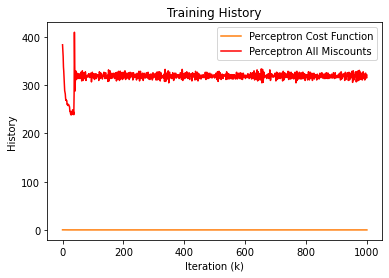

In [160]:
w = 0.1*np.random.randn(21,1)
w_history_percep, c_history_percep = gradient_descent(perceptron,0.1,1000,w)
miscount_history_percep = [miscount(v,x,y) for v in w_history_percep]
pyplot.plot(np.linspace(0,len(c_history_percep),len(c_history_percep)), c_history_percep, color='tab:orange', label='Perceptron Cost Function')
pyplot.plot(np.linspace(0,len(miscount_history_percep),len(miscount_history_percep)), miscount_history_percep, color='r', label='Perceptron All Miscounts')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('History')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

#### Achieved >= 75% accuracy

In [161]:
# Calculate highest possible accuracy with this cost function 
# and index of corresponding best weight.
percep_acc = accuracy(w_history_percep, miscount_history_percep, x, y)[0]
index = accuracy(w_history_percep, miscount_history_percep, x, y)[1]
print("The minimum number of misclassiciations for optimization using \nperceptron cost is ", min(miscount_history_percep), ", which is at index ", index, " of miscount history.")
print("The accuracy using the best w of perceptron cost is: ", percep_acc*100, "%")
print("The corresponding w for this accuracy (the best w using perceptron cost) is:\n", w_history_percep[index])

The minimum number of misclassiciations for optimization using 
perceptron cost is  239 , which is at index  27  of miscount history.
The accuracy using the best w of perceptron cost is:  76.1 %
The corresponding w for this accuracy (the best w using perceptron cost) is:
 [[ 0.09110255]
 [ 0.06698937]
 [-0.02174158]
 [ 0.0436298 ]
 [ 0.00165002]
 [-0.01634864]
 [ 0.02612368]
 [ 0.02085481]
 [-0.02142735]
 [-0.00274672]
 [ 0.01402238]
 [ 0.00994446]
 [-0.04374248]
 [-0.02552982]
 [ 0.00114413]
 [ 0.04325051]
 [-0.029055  ]
 [ 0.00134462]
 [-0.00315591]
 [ 0.03363619]
 [ 0.01755728]]


### 3.3 - Confusion matrix for the optimal weights determined with perceptron cost

In [162]:
# The best w is the last one since it has the lowerst number of misclassifications.
w_star = w_history_percep[index]
print("The best w using perceptron is the last one in this case (at w_history_percep index", index, "since it has the lowest number of misclassifications.")
print("The corresponding confusion matrix for the best w using softmax is:\n", confusion_matrix(w_star,x,y))
print("This best w is:\n", w_star)

The best w using perceptron is the last one in this case (at w_history_percep index 27 since it has the lowest number of misclassifications.
The corresponding confusion matrix for the best w using softmax is:
 [[612  88]
 [151 149]]
This best w is:
 [[ 0.09110255]
 [ 0.06698937]
 [-0.02174158]
 [ 0.0436298 ]
 [ 0.00165002]
 [-0.01634864]
 [ 0.02612368]
 [ 0.02085481]
 [-0.02142735]
 [-0.00274672]
 [ 0.01402238]
 [ 0.00994446]
 [-0.04374248]
 [-0.02552982]
 [ 0.00114413]
 [ 0.04325051]
 [-0.029055  ]
 [ 0.00134462]
 [-0.00315591]
 [ 0.03363619]
 [ 0.01755728]]


# Exercise 4: 3-Class Classification

In [164]:
# load in dataset
data = np.loadtxt('3class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]

def reformat_x(x):
    formatted_x = []
    for i in range(0, x[0].size):
        formatted_x.append(np.array([x[0][i], x[1][i]]))
    return np.array(formatted_x)
formatted_x = reformat_x(x)

In [163]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

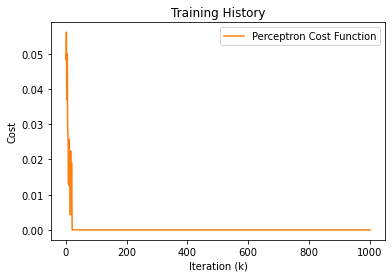

In [165]:
w = 0.1*np.random.randn(3,3)
w_history_percep, c_history_percep = gradient_descent(multiclass_perceptron,0.1,1000,w)
pyplot.plot(np.linspace(0,len(c_history_percep),len(c_history_percep)), c_history_percep, color='tab:orange', label='Perceptron Cost Function')

pyplot.xlabel('Iteration (k)')
pyplot.ylabel('Cost')
pyplot.title('Training History')
pyplot.legend(loc = "upper right")

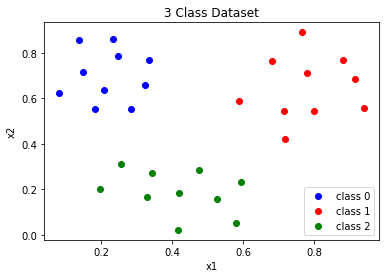

In [166]:
w_last = w_history_percep[-1]

# compute C linear combinations of input point, one per classifier
def model(x, w, c):
    a = w[0] + np.dot(x, w[1:])
    return a

def sort_pred(x, class_pred, c):
    """
    Finds the points of x that are predicted to be of class c, and returns 
    their coordinates.
    """
    x_c = x[class_pred == c] # Find the points of x corresponding to class c
    # Separate those points into their two coordinates
    x1 = x_c[:, 0] 
    x2 = x_c[:, 1]
    return x1, x2

# Compute predictions
pred = model(formatted_x, w_last, 0) # use the optimal weight to generate class predictions
class_pred = np.argmax(pred, axis = 1)  # fusion rule: for each prediction, choose the class of the highest prediction

# Get x values sorted by predicted class
c0_x1, c0_x2 = sort_pred(formatted_x, class_pred, 0)
c1_x1, c1_x2 = sort_pred(formatted_x, class_pred, 1)
c2_x1, c2_x2 = sort_pred(formatted_x, class_pred, 2)

# Plot x values with colour corresponding to predicted class
pyplot.scatter(c0_x1, c0_x2, color = 'b', label = 'class 0')
pyplot.scatter(c1_x1, c1_x2, color = 'r', label = 'class 1')
pyplot.scatter(c2_x1, c2_x2, color = 'g', label = 'class 2')
pyplot.xlabel('x1')
pyplot.ylabel('x2')
pyplot.title('3 Class Dataset')
pyplot.legend()

As can be seen, using the optimal set of weights predicted by the multiclass perceptron cost function, we were able to correctly predict the class of each point in the dataset in accordance with the predictions of Figure 7.9 from the textbook.